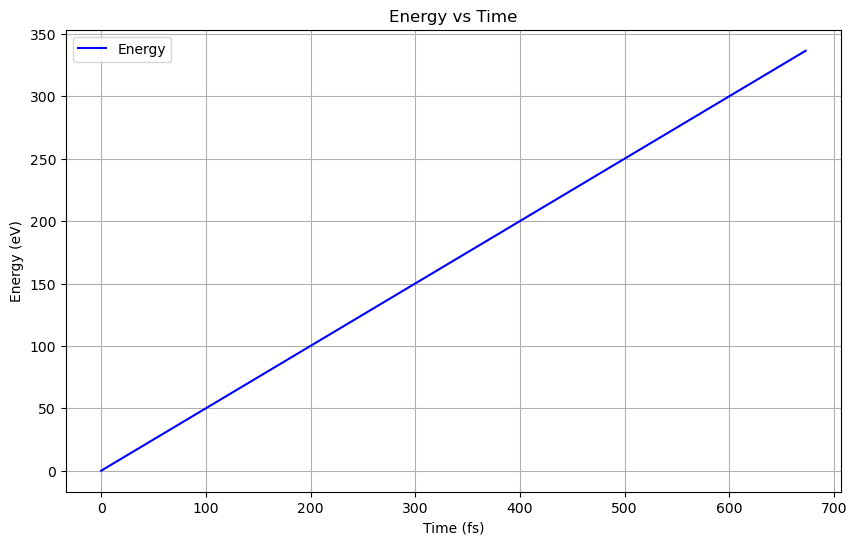

AttributeError: module 'MDAnalysis.analysis.rdf' has no attribute 'RadialDistributionFunction'

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

# Function to load and plot the energy vs time
def plot_energy_vs_time(ener_file):
    # Load the energy data from the .ener file
    with open(ener_file, 'r') as f:
        lines = f.readlines()
    
    # Extract time and energy
    time = []
    energy = []
    for line in lines:
        # Skip lines that start with '#' or are empty
        if line.startswith("#") or line.strip() == "":
            continue
        
        # Otherwise, parse the data
        data = line.split()
        
        # Ensure data has enough columns (time and energy)
        if len(data) >= 2:
            try:
                time.append(float(data[0]))  # Time in fs
                energy.append(float(data[1]))  # Energy in eV
            except ValueError:
                # If conversion to float fails, skip this line
                continue
    
    # Convert to numpy arrays for easy plotting
    time = np.array(time)
    energy = np.array(energy)
    
    # Plot energy vs time
    plt.figure(figsize=(10, 6))
    plt.plot(time, energy, label="Energy", color='b')
    plt.xlabel('Time (fs)')
    plt.ylabel('Energy (eV)')
    plt.title('Energy vs Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to compute and plot radial distribution function (g(r)) for oxygen atoms
def compute_rdf(xyz_file, box_size, selection='name O'):
    # Load the trajectory using MDAnalysis
    u = mda.Universe(xyz_file)  # Load the trajectory from the xyz file

    # Set the box size (from the input or xyz file)
    # Here we assume the box size is a cubic box as per the input file
    u.dimensions = np.array([box_size, box_size, box_size, 90.0, 90.0, 90.0])  # box_size in Angstrom

    # Select the oxygen atoms
    oxygen_atoms = u.select_atoms(selection)
    
    # Calculate g(r) using MDAnalysis's RDF function
    rdf_analysis = rdf.RadialDistributionFunction(oxygen_atoms, selection, range=(0.0, 10.0), bins=100)
    rdf_analysis.run()

    # Plot the RDF
    plt.figure(figsize=(10, 6))
    plt.plot(rdf_analysis.bins, rdf_analysis.rdf, label="g(r) for Oxygen", color='g')
    plt.xlabel('r (Angstrom)')
    plt.ylabel('g(r)')
    plt.title('Radial Distribution Function g(r) for Oxygen')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to call the analysis
def analyze_simulation(ener_file, xyz_file, box_size):
    # Plot energy vs time
    plot_energy_vs_time(ener_file)
    
    # Compute and plot the radial distribution function for oxygen
    compute_rdf(xyz_file, box_size)

# Example of using the functions
ener_file = "water_aimd_1ns_every0.5fs-1.ener"  
xyz_file = "water_aimd_1ns_every0.5fs-pos-1.xyz"    
box_size = 12.42              

# Analyze the simulation
analyze_simulation(ener_file, xyz_file, box_size)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

# Function to compute and plot radial distribution function (g(r)) for oxygen atoms
def compute_rdf(xyz_file, box_size, selection='name O'):
    # Load the trajectory using MDAnalysis
    u = mda.Universe(xyz_file)  # Load the trajectory from the xyz file

    # Set the box size (from the input or xyz file)
    # Here we assume the box size is a cubic box as per the input file
    u.dimensions = np.array([box_size, box_size, box_size, 90.0, 90.0, 90.0])  # box_size in Angstrom

    # Select the oxygen atoms
    oxygen_atoms = u.select_atoms(selection)
    
    # Calculate g(r) using MDAnalysis's RDF function
    rdf_analysis = rdf.RadialDistributionFunction(oxygen_atoms, range=(0.0, 10.0), bins=100)
    rdf_analysis.run()

    # Plot the RDF
    plt.figure(figsize=(10, 6))
    plt.plot(rdf_analysis.bins, rdf_analysis.rdf, label="g(r) for Oxygen", color='g')
    plt.xlabel('r (Angstrom)')
    plt.ylabel('g(r)')
    plt.title('Radial Distribution Function g(r) for Oxygen')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
xyz_file = 'water_aimd_1ns_every0.5fs-pos-1.xyz'  # Replace with the actual path to your xyz file
box_size = 12.42  # Replace with the actual box size

# Compute and plot RDF for oxygen atoms
compute_rdf(xyz_file, box_size)


AttributeError: module 'MDAnalysis.analysis.rdf' has no attribute 'RadialDistributionFunction'